<a href="https://colab.research.google.com/github/AkshitSingh11/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Importing the dataset

In [48]:
credit_card_data = pd.read_csv('creditcard.csv')

# Data Analysis

In [49]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
#dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
#Check for missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Distribution of legit transactions and fraudulent transactions


In [52]:
# 0 -----> Normal Transaction
# 1 -----> Fraudulent Transaction

credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This dataset is highly unbalanced

## Separating the data for analysis

In [53]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [54]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [55]:
#Statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [56]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [57]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Data Preprocessing

## Under-Sampling

### Building a sample dataset containing similar distribution of normal transactions and fraudulent transactions

In [58]:
legit_sample = legit.sample(n=492)

In [59]:
legit_sample.shape

(492, 31)

### Concatenating two dataframes

In [60]:
new_dataset = pd.concat([fraud, legit_sample], axis=0)

In [61]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [62]:
new_dataset.shape

(984, 31)

In [64]:
new_dataset['Class'].value_counts()

,count
Class,
1,492
0,492


In [65]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98305.371951,0.196592,-0.148582,-0.055433,-0.081744,-0.065542,0.003695,-0.098729,0.075417,-0.020456,...,0.049678,-0.007100,0.074982,0.011617,0.032313,0.007073,-0.033466,-0.005249,-0.001172,92.175874
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


We can see after under-sampling, the difference in mean of features are preserved.

## Splitting the data into features and targets

In [66]:
X = new_dataset.iloc[:,:-1]
y = new_dataset.iloc[:,-1]

In [67]:
print(X)
print(y)

            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
236027  148643.0 -1.128288 -1.296764  1.027090 -1.460740 -0.703598  0.132698   
168961  119457.0 -0.401575 -0.251587  0.196694 -2.278108  0.200868 -1.215729   
279202  168704.0 -1.417668  0.056666  2.760027  0.551785 -1.471575  2.525317   
121520   76223.0 -1.163870  0.950431  1.947154 -0.374370  0.505777 -0.324698   
118856   75236.0 -2.207125 -0.076899  0.549952  0.176753  0.216899 -2.046417   

              V7        V8        V9  .

## Splitting the data into training and testing data

In [68]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify = y)

In [69]:
print(X.shape ,X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

## Logistic Regression

In [70]:
model = LogisticRegression(max_iter=7500)

## Training the Logistic Regression Model with Training Data


In [71]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=7500)

## Random Forest Classifier

In [72]:
model2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [73]:
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

# Model Evaluation

In [74]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

## Model Statistics for Logistic Regression

In [75]:
# On training data
X_train_prediction1 = model.predict(X_train)

In [76]:
model_stats(y_train, X_train_prediction1)

Accuracy:  0.9567979669631512
Precision:  0.989100817438692
Recall:  0.9236641221374046


In [77]:
# On testing data
X_test_prediction1 = model.predict(X_test)

In [78]:
model_stats(y_test, X_test_prediction1)

Accuracy:  0.9644670050761421
Precision:  0.9693877551020408
Recall:  0.9595959595959596


In [79]:
# AUC calculation
auc1 = metrics.roc_auc_score(y_test, X_test_prediction1)
print(auc1)

0.9644918573490001


## Model Statistics for Random Forest Classifier

In [80]:
# On training data
X_train_prediction2 = model2.predict(X_train)

In [81]:
model_stats(y_train, X_train_prediction2)

Accuracy:  0.9923761118170267
Precision:  1.0
Recall:  0.9847328244274809


In [82]:
# On testing data
X_test_prediction2 = model2.predict(X_test)

In [83]:
model_stats(y_test, X_test_prediction2)

Accuracy:  0.9390862944162437
Precision:  0.978021978021978
Recall:  0.898989898989899


In [84]:
# AUC calculation
auc2 = metrics.roc_auc_score(y_test, X_test_prediction2)
print(auc2)

0.9392908678622964


# Visualization

## Confusion Matrix

## For Logistic Regression

Text(0.5, 427.9555555555555, 'Predicted')

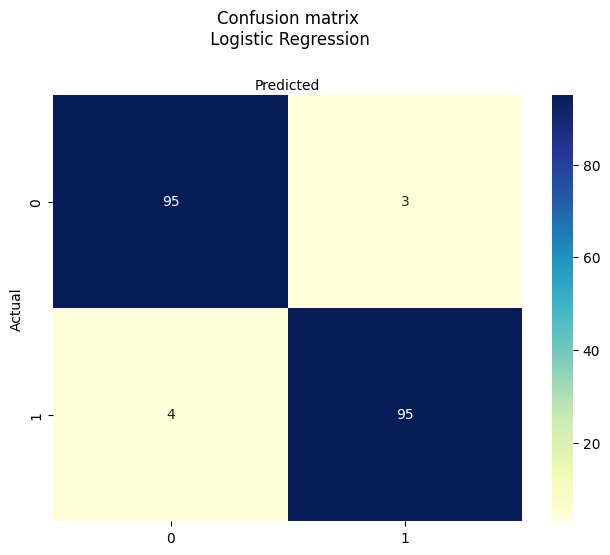

In [85]:
cnf_matrix = metrics.confusion_matrix(y_test, X_test_prediction1)

class_names = [0,1] # Our categories

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n Logistic Regression', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## For  Random Forest Classifier

Text(0.5, 427.9555555555555, 'Predicted')

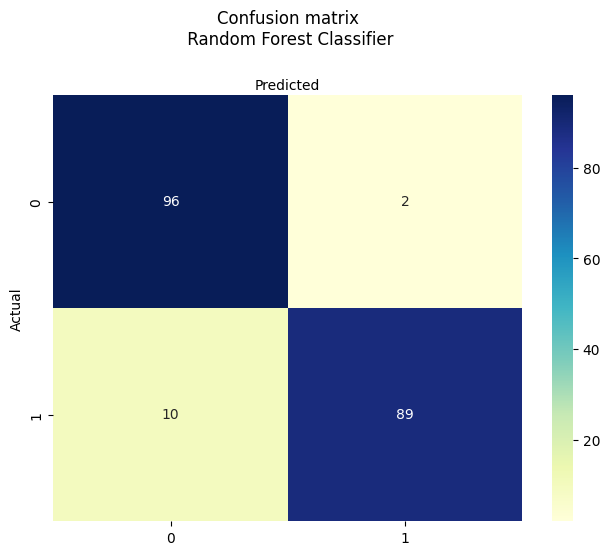

In [86]:
cnf_matrix = metrics.confusion_matrix(y_test, X_test_prediction2)

class_names = [0,1] # Our categories

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n Random Forest Classifier', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

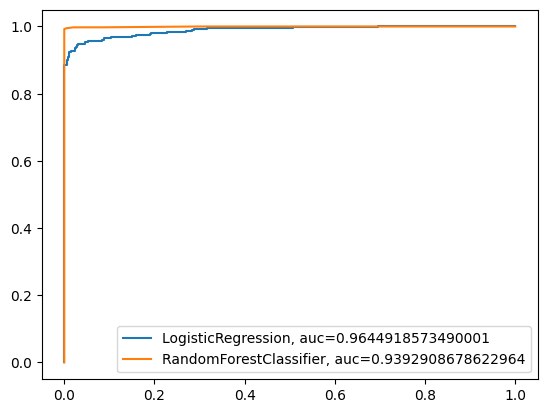

In [87]:
X_train_probability1 = model.predict_proba(X_train)[::,1]
X_train_probability2 = model2.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, X_train_probability1)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc1))
fpr2, tpr2, _ = metrics.roc_curve(y_train, X_train_probability2)
plt.plot(fpr2,tpr2,label="RandomForestClassifier, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

# Conclusion

We can see that AUC of Random Forest Classifier is higher than Logistic Regression. Also the accuracy, precision and recall of the Random Forest Classifier Model is higher than that of Logistic Regression model. Therefore our Random Forest Classifier model is predicting better credit card frauds than our Logistuc Regression model.